In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib.pyplot as plt


In [ ]:
# Load the dataset
df = pd.read_csv(r"file.csv")

# Convert 'time' to datetime and extract month/day
df['time'] = pd.to_datetime(df['time'], dayfirst=True)
df['month'] = df['time'].dt.month
df['day'] = df['time'].dt.day
df.drop(columns='time', inplace=True)

df.head()


,latitude,longitude,temperature,humidity,sand_content,sm_aux,sm_tgt,month,day
0,54.875,9.125,5,86,9,0.454120,0.53,1,3
1,54.875,9.125,5,86,9,0.437102,0.44,1,5
2,54.875,9.125,5,86,9,0.412978,0.42,1,7
3,54.875,9.125,5,86,9,0.378734,0.55,1,8
4,54.875,9.125,5,86,9,0.350740,0.46,1,9


In [3]:
# Remove duplicate feature rows (ignoring the target column)
df_cleaned = df.drop_duplicates(subset=['latitude', 'longitude', 'month', 'day'])

# Check cleaned dataset size
print("Original dataset size:", df.shape)
print("Cleaned dataset size:", df_cleaned.shape)

# Optional sanity check (should be 0)
print("Number of duplicate feature rows remaining:", df_cleaned.duplicated(subset=['latitude', 'longitude', 'month', 'day']).sum())


Original dataset size: (321584, 9)
Cleaned dataset size: (321584, 9)
Number of duplicate feature rows remaining: 0


In [4]:
df_cleaned.head()

,latitude,longitude,temperature,humidity,sand_content,sm_aux,sm_tgt,month,day
0,54.875,9.125,5,86,9,0.454120,0.53,1,3
1,54.875,9.125,5,86,9,0.437102,0.44,1,5
2,54.875,9.125,5,86,9,0.412978,0.42,1,7
3,54.875,9.125,5,86,9,0.378734,0.55,1,8
4,54.875,9.125,5,86,9,0.350740,0.46,1,9


In [5]:
# Separate features and target
X = df_cleaned.drop(columns='sm_tgt')
y = df_cleaned['sm_tgt']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Define the Random Forest Regressor
model = RandomForestRegressor(
    n_estimators=100,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1
)

# Train the model
model.fit(X_train, y_train)


RandomForestRegressor(n_jobs=-1, random_state=42)

In [7]:
# Predict on test set
y_pred = model.predict(X_test)

# Evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("R² Score:", r2)
print("Mean Absolute Error:", mae)


R² Score: 0.7572187027391968
Mean Absolute Error: 0.03828964503941414


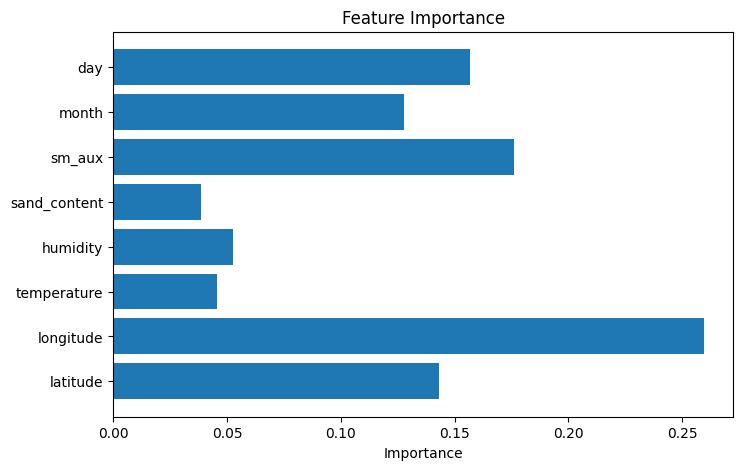

In [8]:
# Feature Importance plot
feature_importances = model.feature_importances_
features = X.columns
plt.figure(figsize=(8, 5))
plt.barh(features, feature_importances)
plt.xlabel("Importance")
plt.title("Feature Importance")
plt.show()


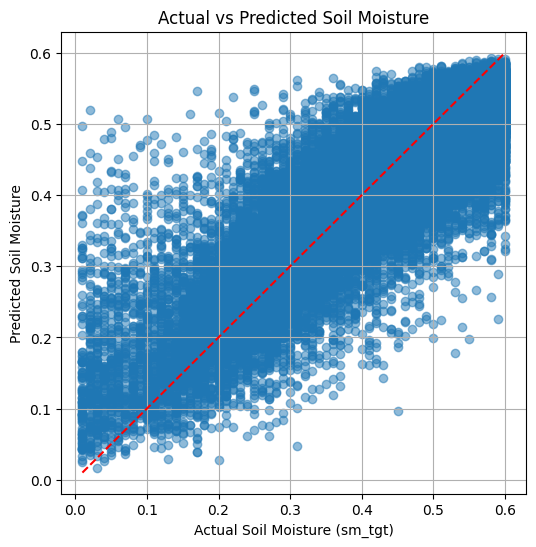

In [9]:
# Scatter plot Actual vs Predicted
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Soil Moisture (sm_tgt)')
plt.ylabel('Predicted Soil Moisture')
plt.title('Actual vs Predicted Soil Moisture')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.grid(True)
plt.show()


In [10]:
# Compare actual vs predicted for first 10 samples
comparison_df = pd.DataFrame({
    'Actual': y_test.values[:10],
    'Predicted': y_pred[:10]
})
comparison_df


,Actual,Predicted
0,0.40,0.4249
1,0.14,0.1129
2,0.46,0.4405
3,0.41,0.4799
4,0.29,0.3080
5,0.52,0.4989
6,0.40,0.3962
7,0.54,0.5024
8,0.54,0.5020
9,0.52,0.5220


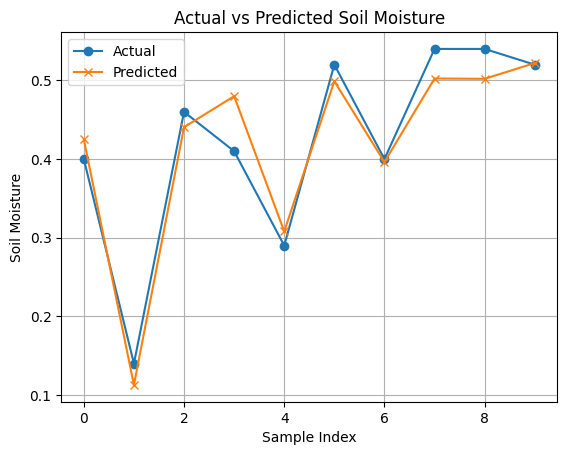

In [11]:
# Sample Actual vs Predicted line plot
data = {
    'Actual': [0.40, 0.14, 0.46, 0.41, 0.29, 0.52, 0.40, 0.54, 0.54, 0.52],
    'Predicted': [0.4249, 0.1129, 0.4405, 0.4799, 0.3080, 0.4989, 0.3962, 0.5024, 0.5020, 0.5220]
}

df_plot = pd.DataFrame(data)

plt.plot(df_plot['Actual'], label='Actual', marker='o')
plt.plot(df_plot['Predicted'], label='Predicted', marker='x')
plt.title('Actual vs Predicted Soil Moisture')
plt.xlabel('Sample Index')
plt.ylabel('Soil Moisture')
plt.legend()
plt.grid(True)
plt.show()


In [12]:
# Predict for a sample input
sample_input = [[12.9716, 77.5946, 30, 45, 25, 0.38, 4, 1]]
predicted_value = model.predict(sample_input)[0] * 100  # convert to %

print("Predicted Soil Moisture (sm_tgt):", predicted_value, "%")

# Crop recommendation based on soil moisture percentage
def recommend_crop(moisture):
    if 0 <= moisture <= 30:
        return ['Millet', 'Sorghum', 'Pearl Millet', 'Pulses']
    elif 30 < moisture <= 60:
        return ['Maize', 'Cotton', 'Groundnut', 'Sunflower']
    elif 60 < moisture <= 100:
        return ['Paddy', 'Sugarcane', 'Jute', 'Taro']
    else:
        return ['Invalid moisture value']

# Get crop recommendation
recommended_crops = recommend_crop(predicted_value)

print("Recommended Crops for this soil moisture:", recommended_crops)


Predicted Soil Moisture (sm_tgt): 35.16999999999999 %
Recommended Crops for this soil moisture: ['Maize', 'Cotton', 'Groundnut', 'Sunflower']


C:\Users\rushe\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [13]:
import joblib

# (your model training code here)
# Let's say your model is in a variable called `model`

joblib.dump(model, 'soil_moisture_model.pkl')


['soil_moisture_model.pkl']